In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
df.shape

(768, 9)

This dataset has 768 rows and 9 features(columns)

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
# Outcome classify
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0= Non Diabetic, 

1= Diabetic

In [21]:
# separating data for analysis

non_diabetic = df[df.Outcome==0]
diabetic = df[df.Outcome==1]

In [14]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


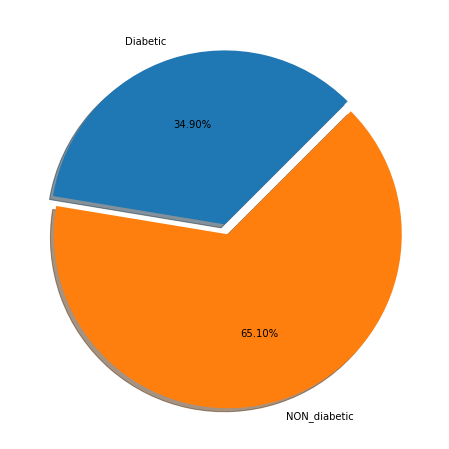

In [19]:
%matplotlib inline
fig, ax1= plt.subplots(figsize=(8,8))
label = ['Diabetic','NON_diabetic']
value=[268,500]
ax1.pie(x=value, labels=label, autopct='%.2f%%', shadow=True, startangle=45, explode=[0,.06])
plt.show()

C:\Users\User\AppData\Local\Temp/ipykernel_3928/758158757.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(diabetic.Age, diabetic.Insulin, color="Red", Label='Diabetic(1)')
C:\Users\User\AppData\Local\Temp/ipykernel_3928/758158757.py:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(non_diabetic.Age, non_diabetic.Insulin, color="Green", Label='Non_Diabetic(0)')


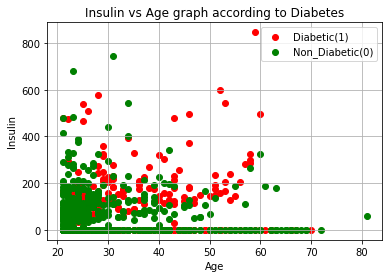

In [23]:
plt.scatter(diabetic.Age, diabetic.Insulin, color="Red", Label='Diabetic(1)')
plt.scatter(non_diabetic.Age, non_diabetic.Insulin, color="Green", Label='Non_Diabetic(0)')
plt.xlabel("Age")
plt.ylabel("Insulin")
plt.legend()
plt.grid()
plt.title("Insulin vs Age graph according to Diabetes")
plt.show()

C:\Users\User\AppData\Local\Temp/ipykernel_3928/665494234.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(diabetic.Age, diabetic.Outcome, color="Red", marker=">", Label='Diabetic(1)')
C:\Users\User\AppData\Local\Temp/ipykernel_3928/665494234.py:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(non_diabetic.Age, non_diabetic.Outcome, color="Green", marker=">", Label='Non_Diabetic(0)')


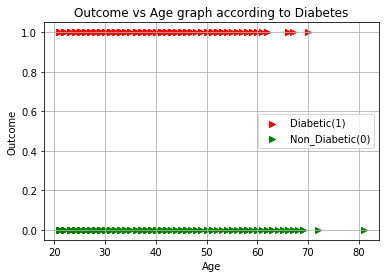

In [25]:
plt.scatter(diabetic.Age, diabetic.Outcome, color="Red", marker=">", Label='Diabetic(1)')
plt.scatter(non_diabetic.Age, non_diabetic.Outcome, color="Green", marker=">", Label='Non_Diabetic(0)')
plt.xlabel("Age")
plt.ylabel("Outcome")
plt.legend()
plt.grid()
plt.title("Outcome vs Age graph according to Diabetes")
plt.show()

C:\Users\User\AppData\Local\Temp/ipykernel_3928/1632311289.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(diabetic.Age, diabetic.Glucose, color="Red", marker="*", Label='Diabetic(1)')
C:\Users\User\AppData\Local\Temp/ipykernel_3928/1632311289.py:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(non_diabetic.Age, non_diabetic.Glucose, color="Green", marker="*", Label='Non_Diabetic(0)')


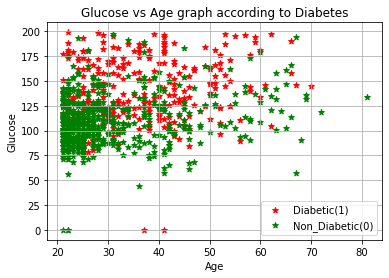

In [26]:
plt.scatter(diabetic.Age, diabetic.Glucose, color="Red", marker="*", Label='Diabetic(1)')
plt.scatter(non_diabetic.Age, non_diabetic.Glucose, color="Green", marker="*", Label='Non_Diabetic(0)')
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.grid()
plt.title("Glucose vs Age graph according to Diabetes")
plt.show()

C:\Users\User\AppData\Local\Temp/ipykernel_3928/913379021.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(diabetic.Age, diabetic.BloodPressure, color="Red", marker="^", Label='Diabetic(1)')
C:\Users\User\AppData\Local\Temp/ipykernel_3928/913379021.py:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(non_diabetic.Age, non_diabetic.BloodPressure, color="Green", marker="^", Label='Non_Diabetic(0)')


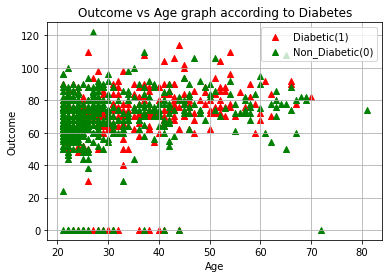

In [28]:
plt.scatter(diabetic.Age, diabetic.BloodPressure, color="Red", marker="^", Label='Diabetic(1)')
plt.scatter(non_diabetic.Age, non_diabetic.BloodPressure, color="Green", marker="^", Label='Non_Diabetic(0)')
plt.xlabel("Age")
plt.ylabel("Outcome")
plt.legend()
plt.grid()
plt.title("Outcome vs Age graph according to Diabetes")
plt.show()

In [29]:
# spliting dataset for training
X = df.drop(columns='Outcome',axis = 1)
Y = df['Outcome']

In [30]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [35]:
# Data Standardization

scaler= StandardScaler()
scaler.fit(X)

StandardScaler()

In [36]:
standerdized_data= scaler.transform(X)

In [38]:
print(standerdized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [40]:
X = standerdized_data
Y = df['Outcome']

In [41]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, stratify=Y, random_state=2)

In [43]:
print("Total: ",X.shape)
print("For Training: ",X_train.shape)
print("For Testing: ",X_test.shape)

Total:  (768, 8)
For Training:  (614, 8)
For Testing:  (154, 8)


In [47]:
# model training using SVM

from sklearn import svm
model = svm.SVC(kernel='linear')

In [49]:
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [50]:
y_predict = model.predict(X_test)
print("Predict Result: ",y_predict)

Predict Result:  [0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 0]


In [51]:
# accuracy score for training data and testing data
X_train_prediction=model.predict(X_train)
X_training_accuracy=accuracy_score(X_train_prediction,Y_train)

X_test_prediction=model.predict(X_test)
X_testing_accuracy=accuracy_score(X_test_prediction,Y_test)

In [52]:
print('Accuracy score for training data: ',X_training_accuracy)
print('Accuracy score for testing data: ',X_testing_accuracy)

Accuracy score for training data:  0.7866449511400652
Accuracy score for testing data:  0.7727272727272727


In [53]:
#using logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [56]:
# accuracy score for training data and testing data
X_train_prediction=lr.predict(X_train)
X_training_accuracy=accuracy_score(X_train_prediction,Y_train)

X_test_prediction=lr.predict(X_test)
X_testing_accuracy=accuracy_score(X_test_prediction,Y_test)

In [57]:
print('Accuracy score for training data: ',X_training_accuracy)
print('Accuracy score for testing data: ',X_testing_accuracy)

Accuracy score for training data:  0.7850162866449512
Accuracy score for testing data:  0.7597402597402597
